In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import numpy as np

from IPython.display import display, HTML
display(HTML("<style>.jp-Cell { margin-left: -35% !important; margin-right: -35% !important; }</style>"))

In [48]:
def plot_and_show_statistics(filename, bin_count, x_max):
    font_size = 16
    # CSV 파일 읽기
    data = pd.read_csv(filename)
    
    # 통계적 수치 계산
    allocation_rate_stats = data['Allocation Rate'].describe()
    utilization_rate_stats = data['Utilization Rate'].describe()
    
    print("Allocation Rate Statistics:")
    print(allocation_rate_stats)
    print("\nUtilization Rate Statistics:")
    print(utilization_rate_stats)
    
    # 그림 그릴 준비
    fig, axs = plt.subplots(2, 2, figsize=(20, 10))
    
    # Allocation Rate 히스토그램 및 KDE 그리기
    #sns.histplot(data['Allocation Rate'], bins=bin_count, kde=True, ax=axs[0, 0], color='blue')
    sns.kdeplot(data['Allocation Rate'], ax=axs[0, 0], color='blue')
    axs[0, 0].set_title('Allocation Rate Distribution', fontsize=font_size+4)
    axs[0, 0].set_xlim(0, 100)
    axs[0, 0].set_xlabel('Rate', fontsize=font_size)
    axs[0, 0].set_ylabel('Density', fontsize=font_size)
    axs[0, 0].tick_params(axis='x', labelsize=font_size-2)  # x축 눈금 글자 크기
    axs[0, 0].tick_params(axis='y', labelsize=font_size-2)  # y축 눈금 글자 크기

    
    # Utilization Rate 히스토그램 및 KDE 그리기
    #sns.histplot(data['Utilization Rate'], bins=bin_count, kde=True, ax=axs[0, 1], color='green')
    sns.kdeplot(data['Utilization Rate'], ax=axs[0, 1], color='green')
    axs[0, 1].set_title('Utilization Rate Distribution', fontsize=font_size+4)
    axs[0, 1].set_xlim(0, 100)
    axs[0, 1].set_xlabel('Rate', fontsize=font_size)
    axs[0, 1].set_ylabel('Density', fontsize=font_size)
    axs[0, 1].tick_params(axis='x', labelsize=font_size-2)  # x축 눈금 글자 크기
    axs[0, 1].tick_params(axis='y', labelsize=font_size-2)  # y축 눈금 글자 크기
    
# 기존 하단 서브플롯 삭제
    for j in range(2):
        fig.delaxes(axs[1, j])
    
    # 새로운 하단 서브플롯 추가
    ax_combined = fig.add_subplot(212)  # 하단 전체를 차지하도록 설정
    
    x_allocation = np.arange(len(data))
    y_allocation = data['Allocation Rate']
    x_new_allocation = np.linspace(x_allocation.min(), x_allocation.max(), 300)
    spl_allocation = make_interp_spline(x_allocation, y_allocation, k=3)
    y_smooth_allocation = spl_allocation(x_new_allocation)
    
    x_utilization = np.arange(len(data))
    y_utilization = data['Utilization Rate']
    x_new_utilization = np.linspace(x_utilization.min(), x_utilization.max(), 300)
    spl_utilization = make_interp_spline(x_utilization, y_utilization, k=3)
    y_smooth_utilization = spl_utilization(x_new_utilization)
    
    ax_combined.plot(x_new_allocation, y_smooth_allocation, color='green', label='Allocation Rate')
    ax_combined.plot(x_new_utilization, y_smooth_utilization, color='black', label='Utilization Rate')

    ax_combined.set_xlim(0, x_max)
    ax_combined.set_title('Allocation Rate and Utilization Rate Over Time', fontsize=font_size+4)
    ax_combined.set_xlabel('Index', fontsize=font_size+2)
    ax_combined.set_ylabel('Rate', fontsize=font_size+2)
    ax_combined.legend(fontsize=font_size)
    ax_combined.tick_params(axis='x', labelsize=font_size-2)  # x축 눈금 글자 크기
    ax_combined.tick_params(axis='y', labelsize=font_size-2)  # y축 눈금 글자 크기
    
    base_filename = os.path.splitext(os.path.basename(filename))[0]
    png_filename = f"{base_filename}.png"
        # 전체 제목 설정
    fig.suptitle(base_filename, fontsize=16)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # 제목 공간 확보
    

    # 그래프를 png 파일로 저장
    plt.savefig(png_filename)
    plt.show()

In [42]:
def plot_and_show_statistics_compare_all(filenames, bin_count, x_max, show_legend, title):
    font_size = 16
    # 파일 개수가 4개인지 확인
    #if len(filenames) != 4:
    #    raise ValueError("파일 개수는 반드시 4개여야 합니다.")
    
    # CSV 파일 읽기
    data = [pd.read_csv(file) for file in filenames]
    colors = ['gray', 'blue', 'red', 'green']
    labels = ['Normal', 'Optimized', 'Optimized(S)', 'Optimized(P)']

    if show_legend == True:
        # 통계적 수치 계산 및 출력
        for i, (df, label) in enumerate(zip(data, labels)):
            print(f"{label} - Allocation Rate Statistics:")
            print(df['Allocation Rate'].describe())
            print(f"\n{label} - Utilization Rate Statistics:")
            print(df['Utilization Rate'].describe())
            print("\n" + "="*50 + "\n")
    
    # 그림 그릴 준비
    fig, axs = plt.subplots(2, 2, figsize=(20, 10))
    
    # KDE 그리기 및 x축 최대값 설정
    for df, color, label in zip(data, colors, labels):
        sns.kdeplot(df['Allocation Rate'], ax=axs[0, 0], color=color, label=label)
        sns.kdeplot(df['Utilization Rate'], ax=axs[0, 1], color=color, label=label)
    
    axs[0, 0].set_title('Allocation Rate', fontsize=font_size+4)
    axs[0, 0].set_xlim(0, 100)
    axs[0, 0].legend(fontsize=font_size-2)
    axs[0, 0].set_xlabel('Rate', fontsize=font_size)
    axs[0, 0].set_ylabel('Density', fontsize=font_size)
    axs[0, 0].tick_params(axis='x', labelsize=font_size-2)  # x축 눈금 글자 크기
    axs[0, 0].tick_params(axis='y', labelsize=font_size-2)  # y축 눈금 글자 크기
    
    axs[0, 1].set_title('Utilization Rate', fontsize=font_size+4)
    axs[0, 1].set_xlim(0, 100)
    axs[0, 1].legend(fontsize=font_size-2)
    axs[0, 1].set_xlabel('Rate', fontsize=font_size)
    axs[0, 1].set_ylabel('Density', fontsize=font_size)
    axs[0, 1].tick_params(axis='x', labelsize=font_size-2)  # x축 눈금 글자 크기
    axs[0, 1].tick_params(axis='y', labelsize=font_size-2)  # y축 눈금 글자 크기

    # 기존 하단 서브플롯 삭제
    for j in range(2):
        fig.delaxes(axs[1, j])
    
    # 새로운 하단 서브플롯 추가
    ax_combined = fig.add_subplot(212)
    
    # Allocation 및 Utilization Rate의 스무스 곡선
    for df, color, label in zip(data, colors, labels):
        x = np.arange(len(df))
        allocation = df['Allocation Rate']
        utilization = df['Utilization Rate']
        
        # 스무스 곡선 생성
        x_new = np.linspace(x.min(), x.max(), 300)
        allocation_smooth = make_interp_spline(x, allocation, k=3)(x_new)
        utilization_smooth = make_interp_spline(x, utilization, k=3)(x_new)
        
        # 곡선 그리기
        ax_combined.plot(x_new, allocation_smooth, color=color, label=f'{label} - Allocation Rate')
        ax_combined.plot(x_new, utilization_smooth, color=color, linestyle='--', label=f'{label} - Utilization Rate')
    
    # x축 최대값 적용
    ax_combined.set_xlim(0, x_max)
    ax_combined.set_title(title, fontsize=font_size+8)
    ax_combined.set_xlabel('Index', fontsize=font_size+2)
    ax_combined.set_ylabel('Rate', fontsize=font_size+2)
    ax_combined.legend()
    ax_combined.tick_params(axis='x', labelsize=font_size-2)  # x축 눈금 글자 크기
    ax_combined.tick_params(axis='y', labelsize=font_size-2)  # y축 눈금 글자 크기

    # Legend를 그래프 밖에 표시
    ax_combined.legend(
        loc='upper left', 
        bbox_to_anchor=(1.01, 1),  # 그래프 밖 오른쪽 상단에 위치
        borderaxespad=0,
        fontsize=font_size)
    
    # 그래프 제목 설정
    base_filenames = [os.path.splitext(os.path.basename(file))[0] for file in filenames]
    fig.suptitle(' vs '.join(base_filenames), fontsize=font_size)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # 제목 공간 확보
    
    # 그래프를 png 파일로 저장
    png_filename = "_vs_".join(base_filenames) + ".png"
    plt.savefig(png_filename)
    plt.show()

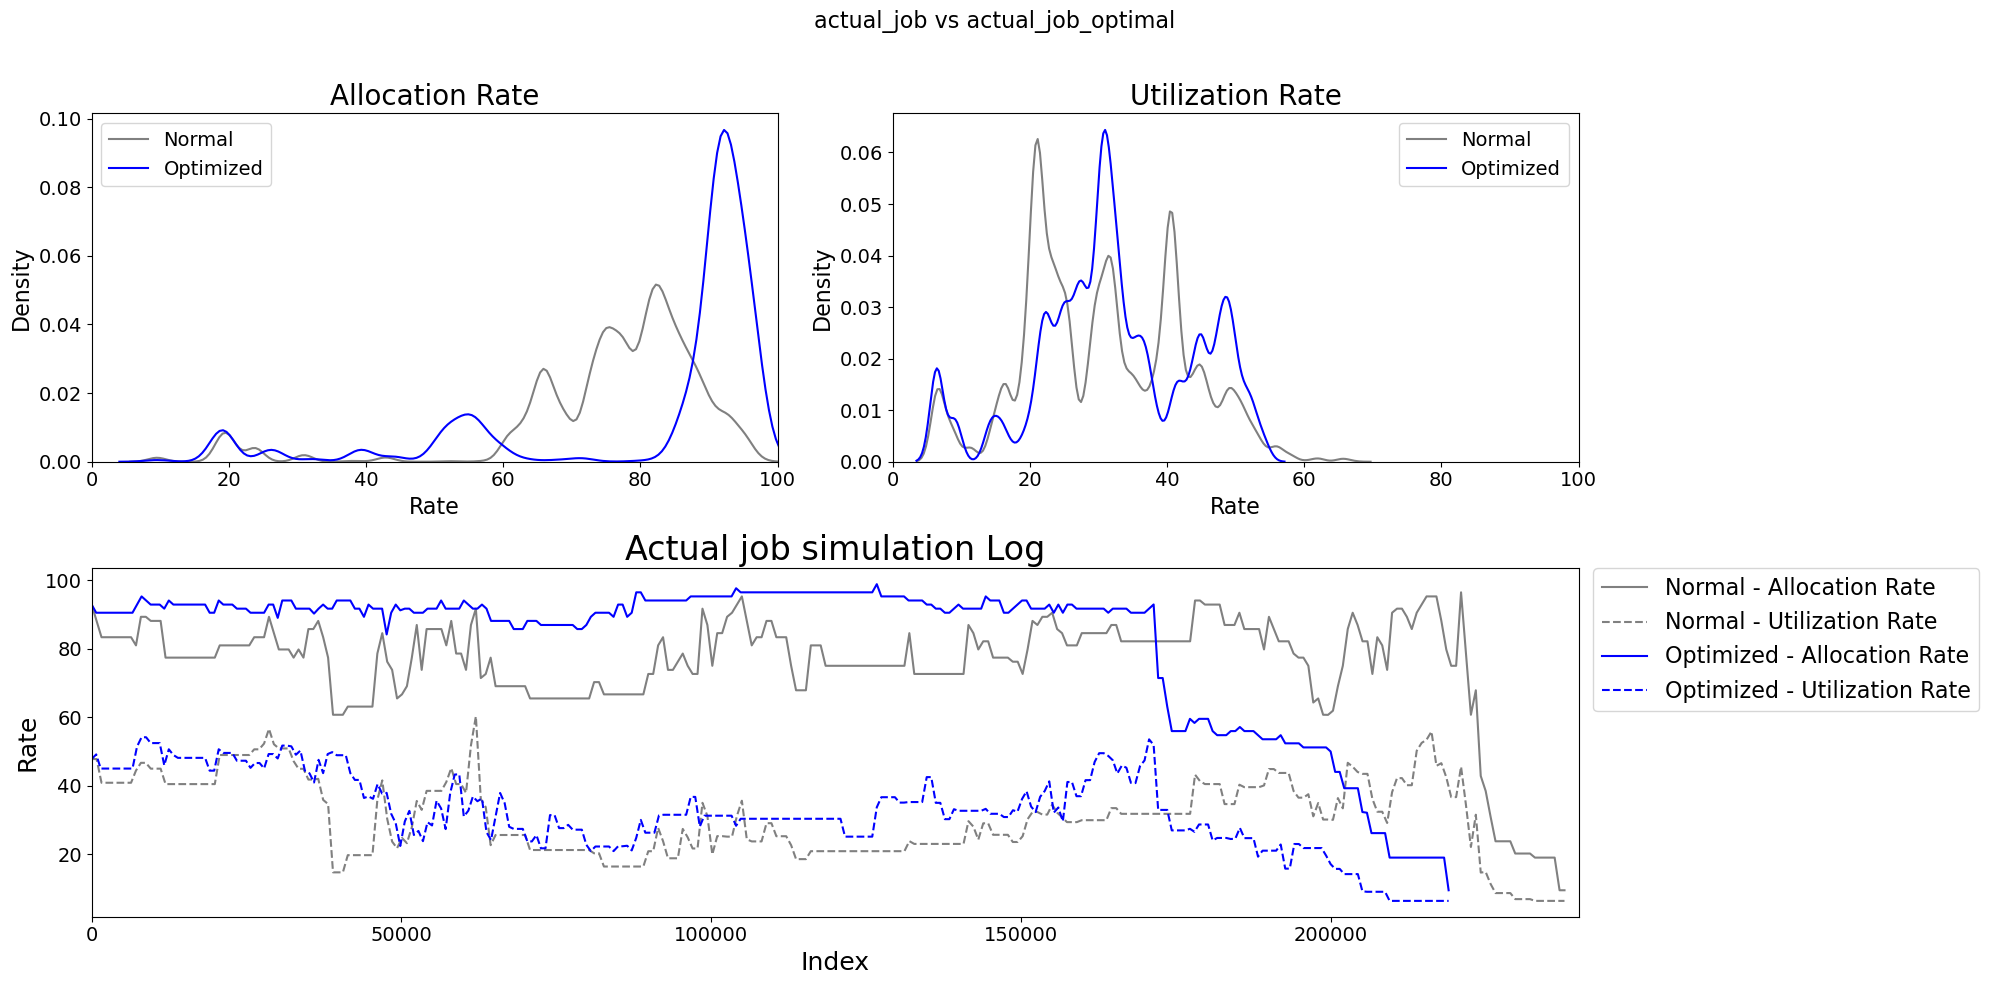

In [44]:
filenames = ["actual_job.result", "actual_job_optimal.result"]
plot_and_show_statistics_compare_all(
    filenames, 
    bin_count=30, 
    x_max=240000, 
    show_legend=False, 
    title='Actual job simulation Log'
)

Normal - Allocation Rate Statistics:
count    237720.000000
mean         75.541755
std          15.589122
min           9.523810
25%          72.619000
50%          78.571400
75%          84.523800
max          97.619000
Name: Allocation Rate, dtype: float64

Normal - Utilization Rate Statistics:
count    237720.000000
mean         30.586813
std          11.525356
min           6.423200
25%          21.258800
50%          29.961800
75%          40.488800
max          66.758900
Name: Utilization Rate, dtype: float64


Optimized - Allocation Rate Statistics:
count    219019.000000
mean         81.991912
std          21.377952
min           9.523810
25%          86.904800
50%          91.666700
75%          94.047600
max          98.809500
Name: Allocation Rate, dtype: float64

Optimized - Utilization Rate Statistics:
count    219019.000000
mean         32.378264
std          11.536998
min           6.423200
25%          25.161900
50%          31.286000
75%          41.707800
max         

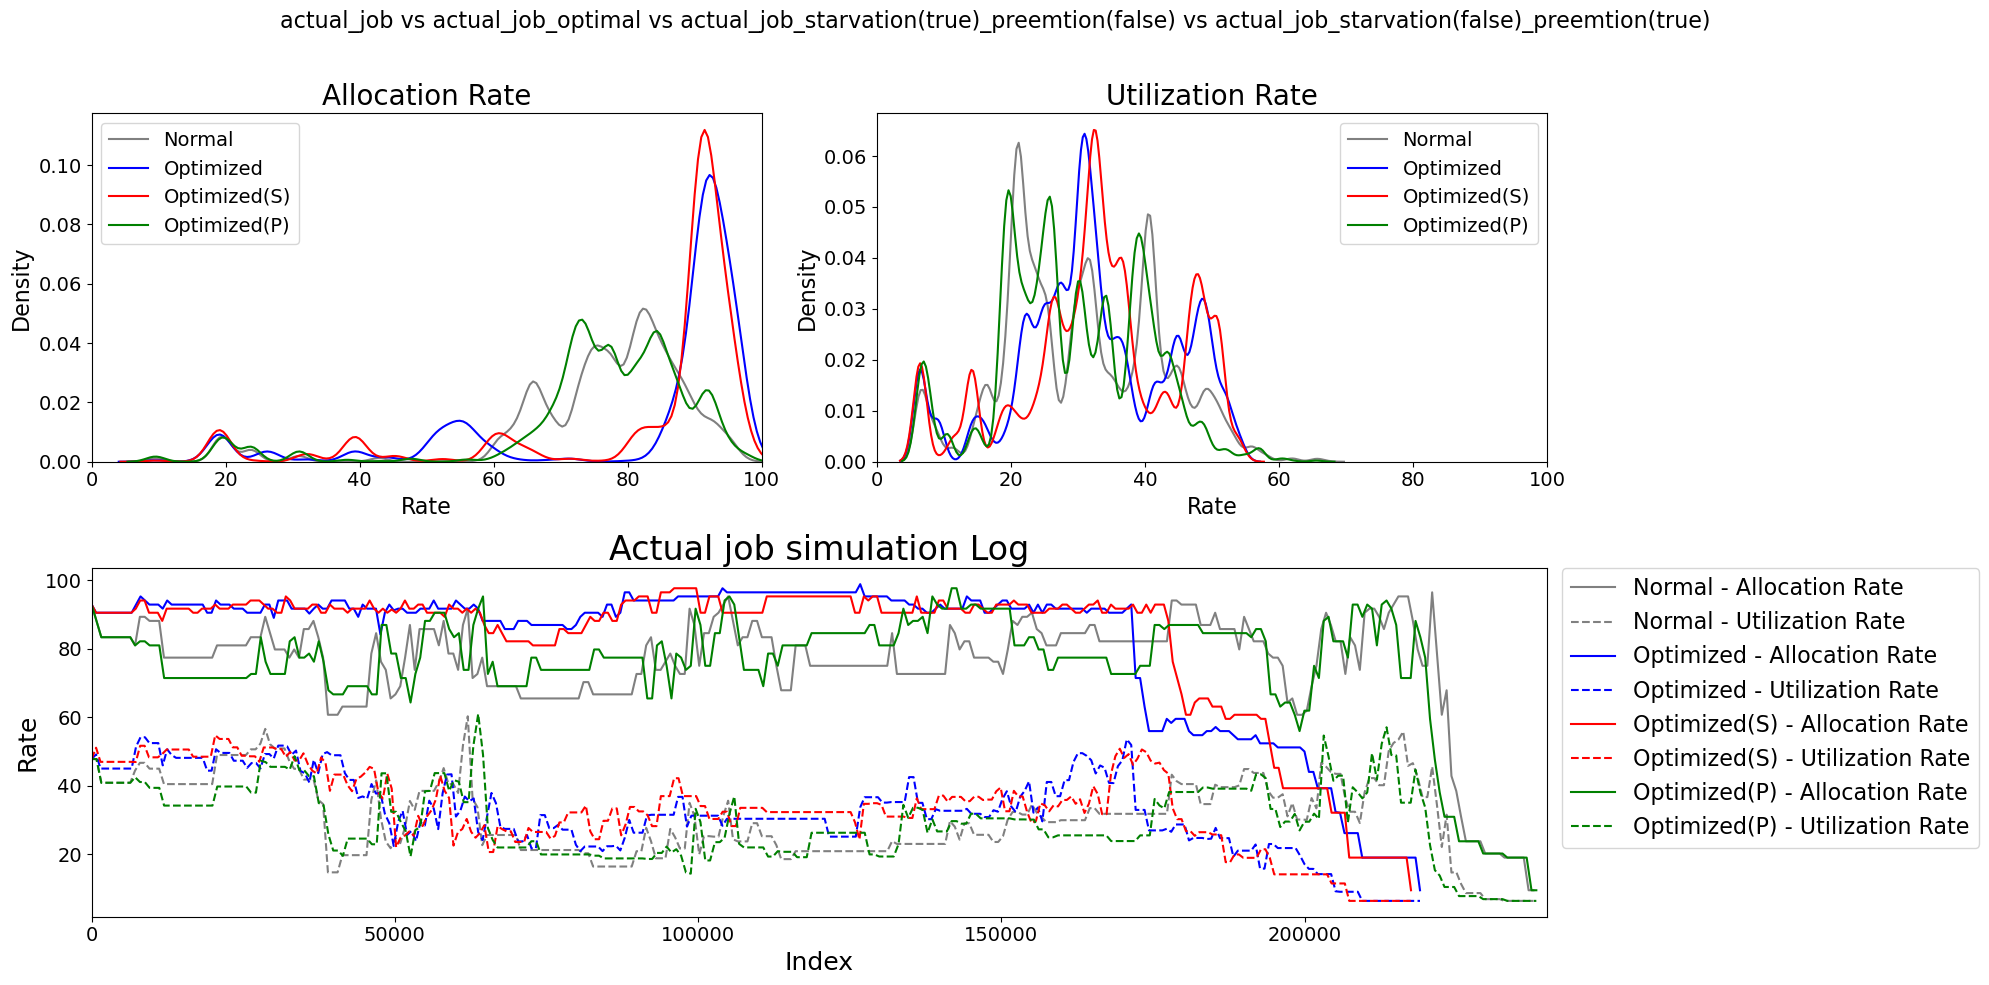

In [43]:
filenames = ["actual_job.result", "actual_job_optimal.result", "actual_job_starvation(true)_preemtion(false).result", "actual_job_starvation(false)_preemtion(true).result"]
plot_and_show_statistics_compare_all(
    filenames, 
    bin_count=30, 
    x_max=240000, 
    show_legend=True, 
    title='Actual job simulation Log'
)

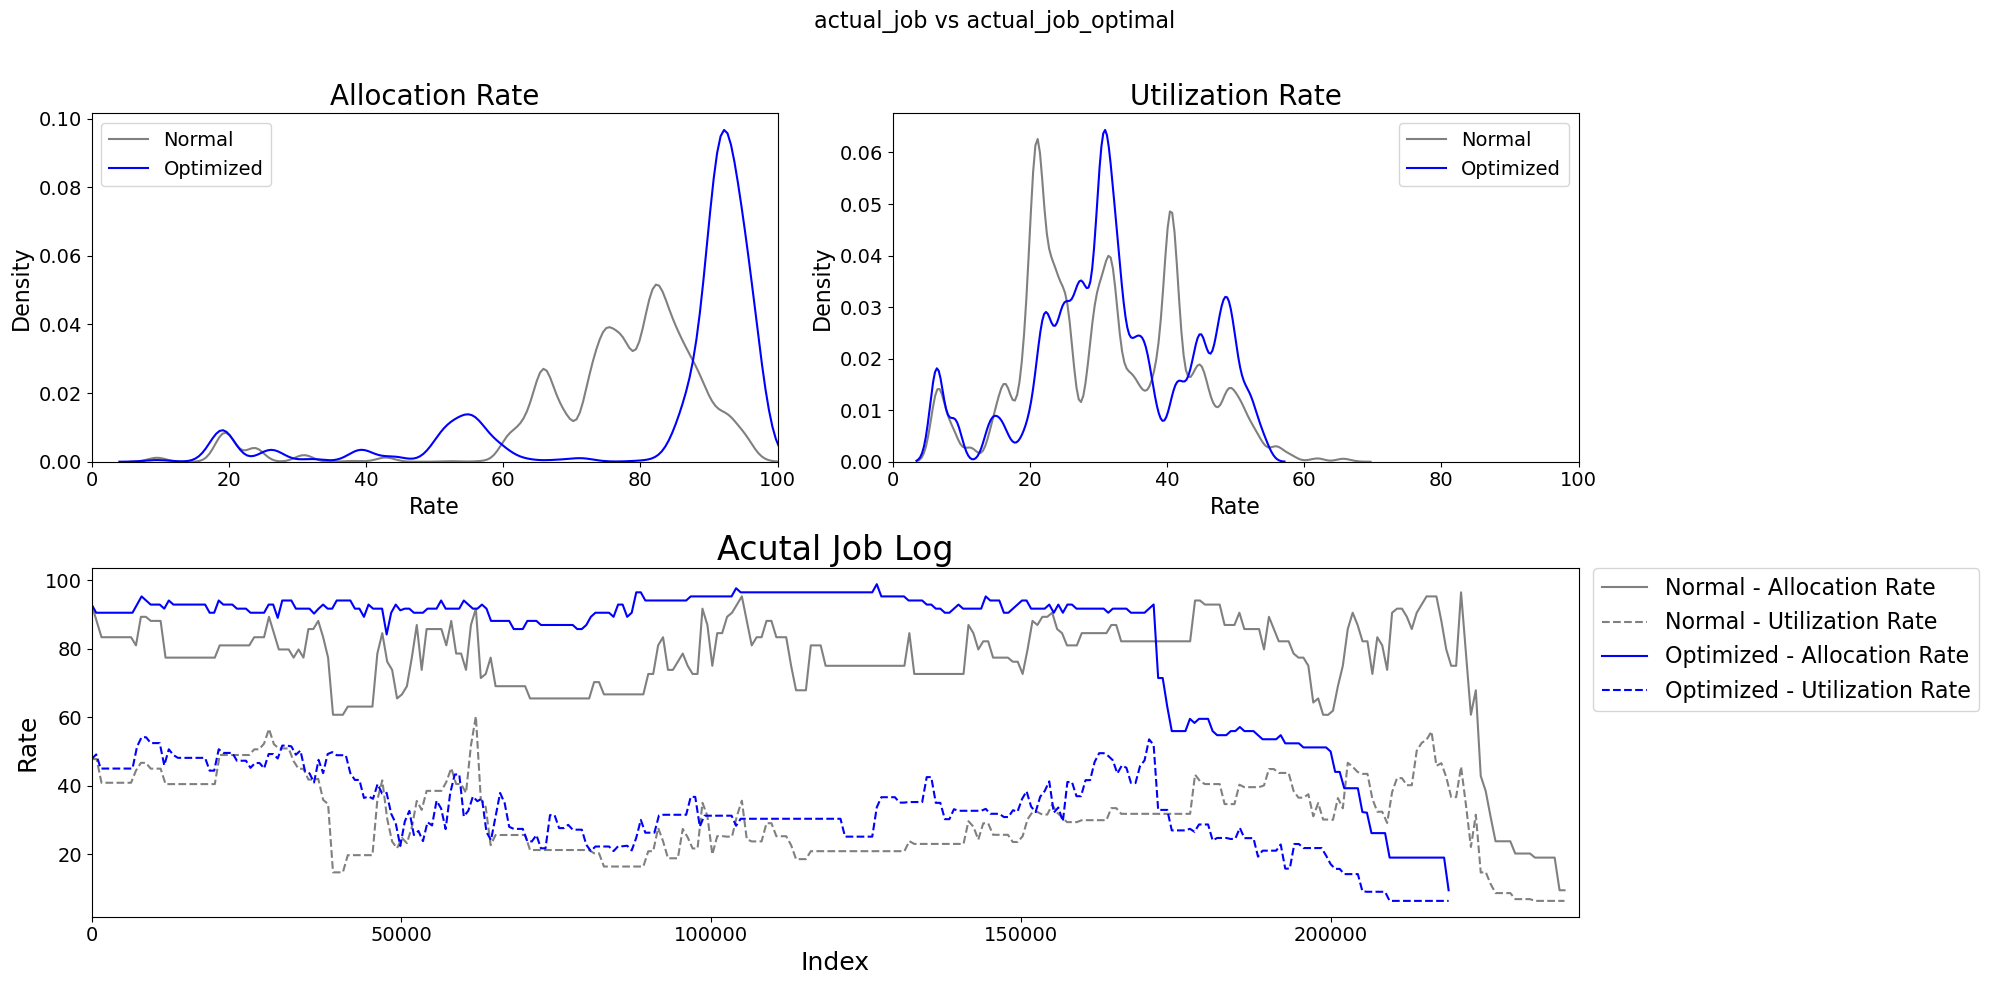

In [54]:
filenames = ["actual_job.result", "actual_job_optimal.result"]
plot_and_show_statistics_compare_all(
    filenames, 
    bin_count=30, 
    x_max=240000, 
    show_legend=False, 
    title='Acutal Job Log'
)

Allocation Rate Statistics:
count    237720.000000
mean         75.541755
std          15.589122
min           9.523810
25%          72.619000
50%          78.571400
75%          84.523800
max          97.619000
Name: Allocation Rate, dtype: float64

Utilization Rate Statistics:
count    237720.000000
mean         30.586813
std          11.525356
min           6.423200
25%          21.258800
50%          29.961800
75%          40.488800
max          66.758900
Name: Utilization Rate, dtype: float64


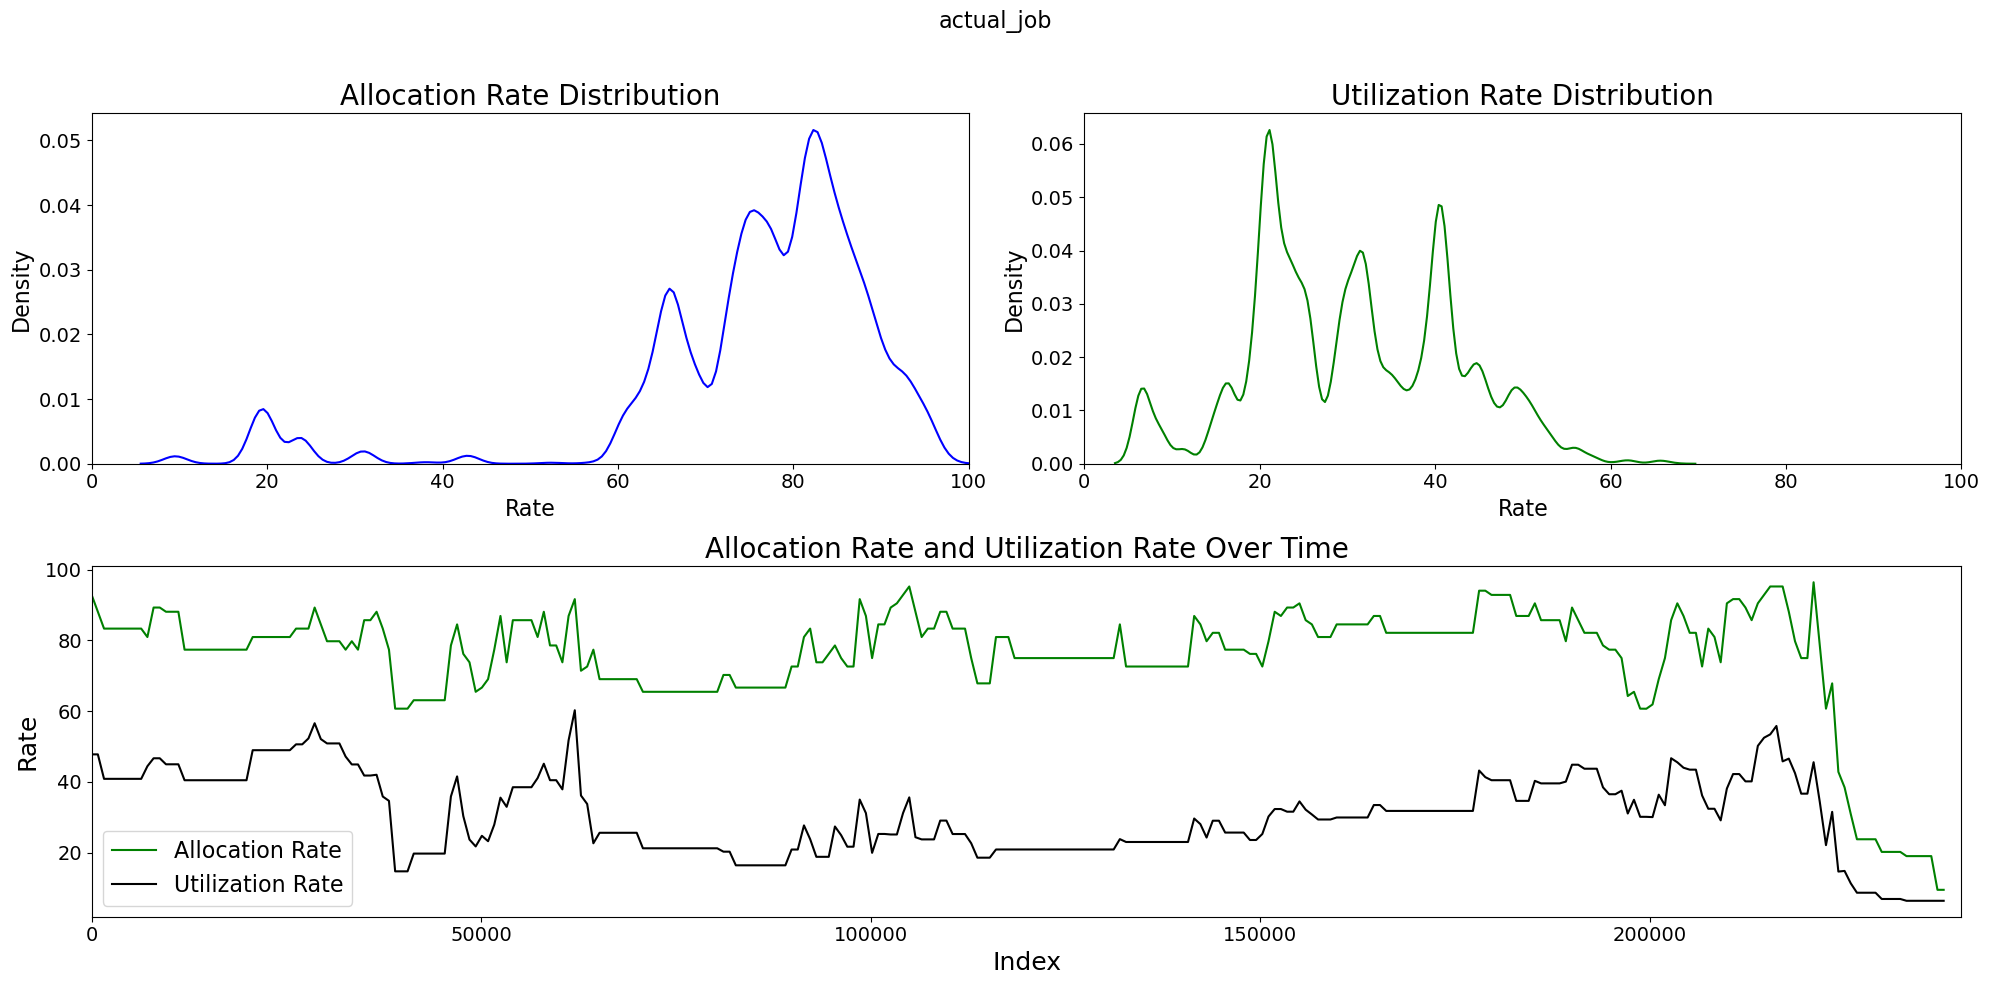

In [49]:
plot_and_show_statistics("actual_job.result", 100, 240000)

Allocation Rate Statistics:
count    219019.000000
mean         81.991912
std          21.377952
min           9.523810
25%          86.904800
50%          91.666700
75%          94.047600
max          98.809500
Name: Allocation Rate, dtype: float64

Utilization Rate Statistics:
count    219019.000000
mean         32.378264
std          11.536998
min           6.423200
25%          25.161900
50%          31.286000
75%          41.707800
max          54.156600
Name: Utilization Rate, dtype: float64


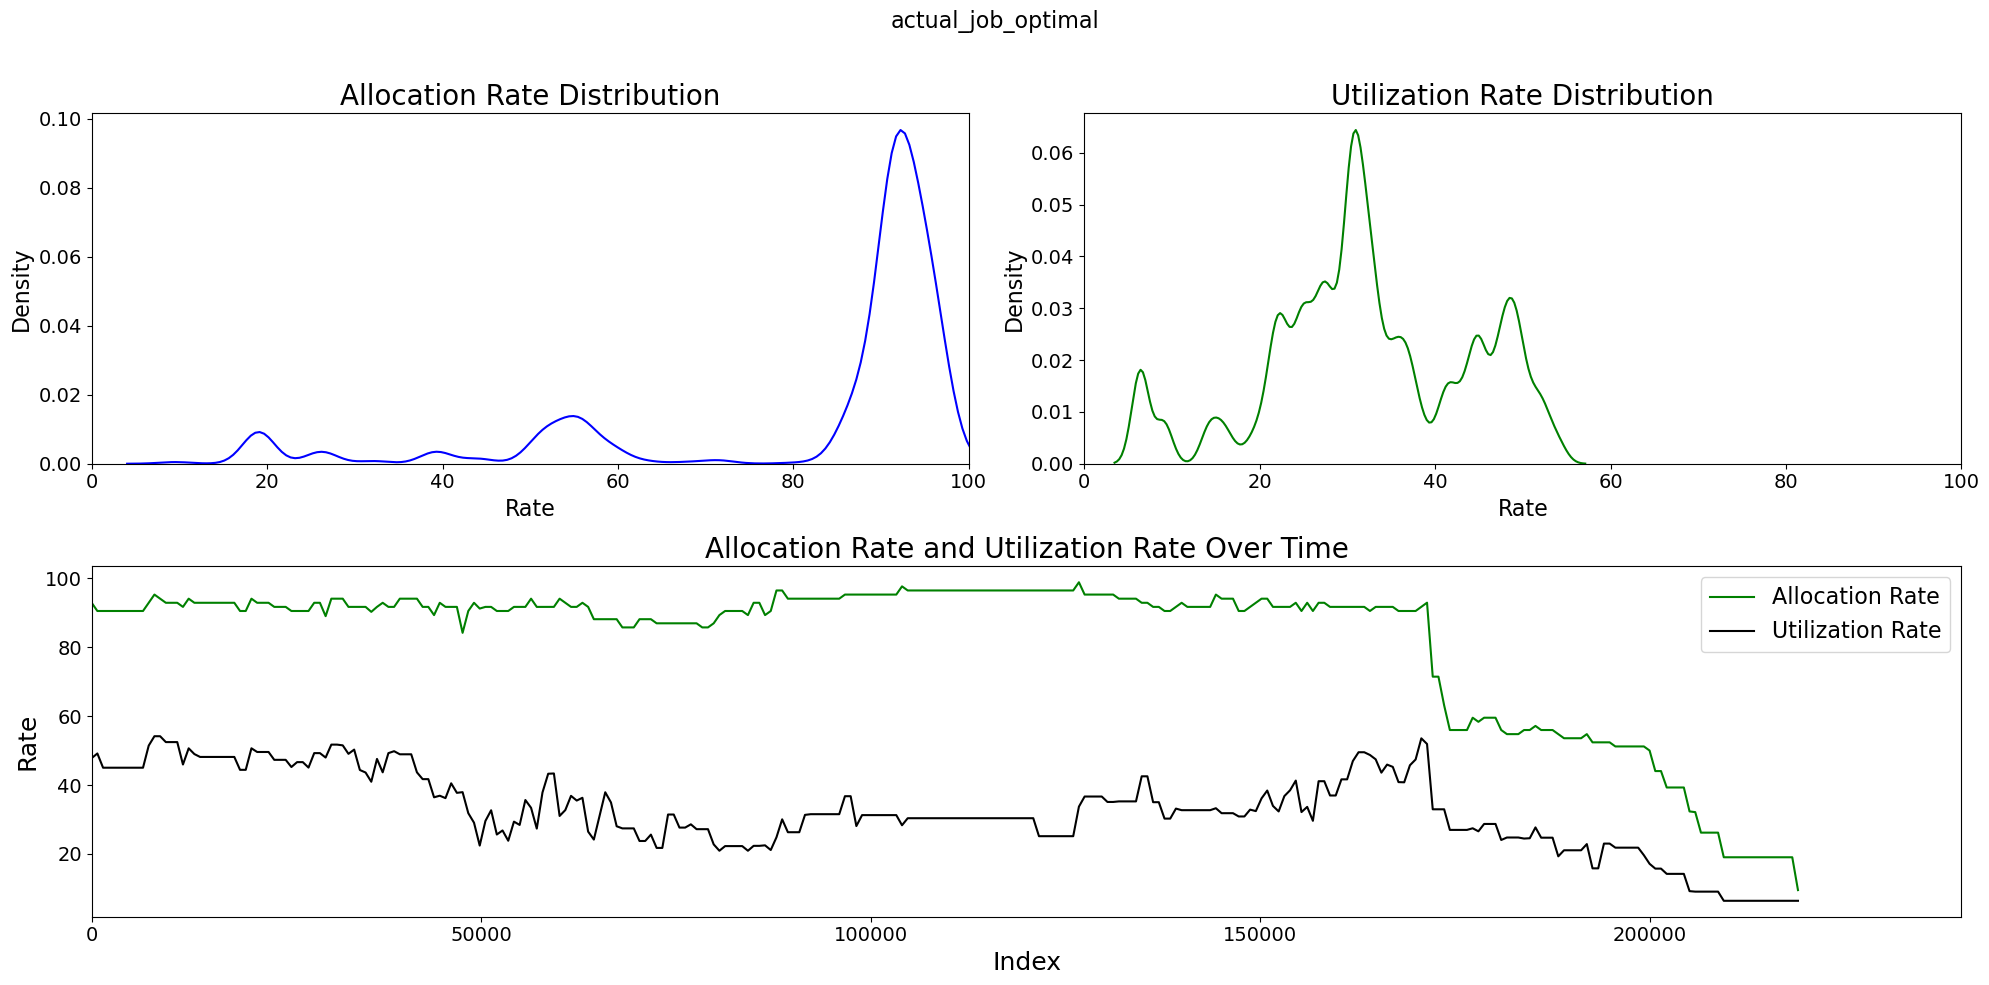

In [51]:
plot_and_show_statistics("actual_job_optimal.result", 100, 240000)

Normal - Allocation Rate Statistics:
count    2.228040e+06
mean     6.995303e+01
std      1.252856e+01
min      9.523810e+00
25%      6.428570e+01
50%      7.142860e+01
75%      7.738100e+01
max      9.880950e+01
Name: Allocation Rate, dtype: float64

Normal - Utilization Rate Statistics:
count    2.228040e+06
mean     2.944249e+01
std      1.080421e+01
min      1.617670e+00
25%      2.282260e+01
50%      2.824780e+01
75%      3.640940e+01
max      6.468000e+01
Name: Utilization Rate, dtype: float64


Optimized - Allocation Rate Statistics:
count    2.108646e+06
mean     7.391385e+01
std      1.588907e+01
min      5.952380e+00
25%      6.666670e+01
50%      7.500000e+01
75%      8.452380e+01
max      9.880950e+01
Name: Allocation Rate, dtype: float64

Optimized - Utilization Rate Statistics:
count    2.108646e+06
mean     3.094486e+01
std      1.194653e+01
min      0.000000e+00
25%      2.369610e+01
50%      3.034920e+01
75%      3.733580e+01
max      6.762000e+01
Name: Utilization Rat

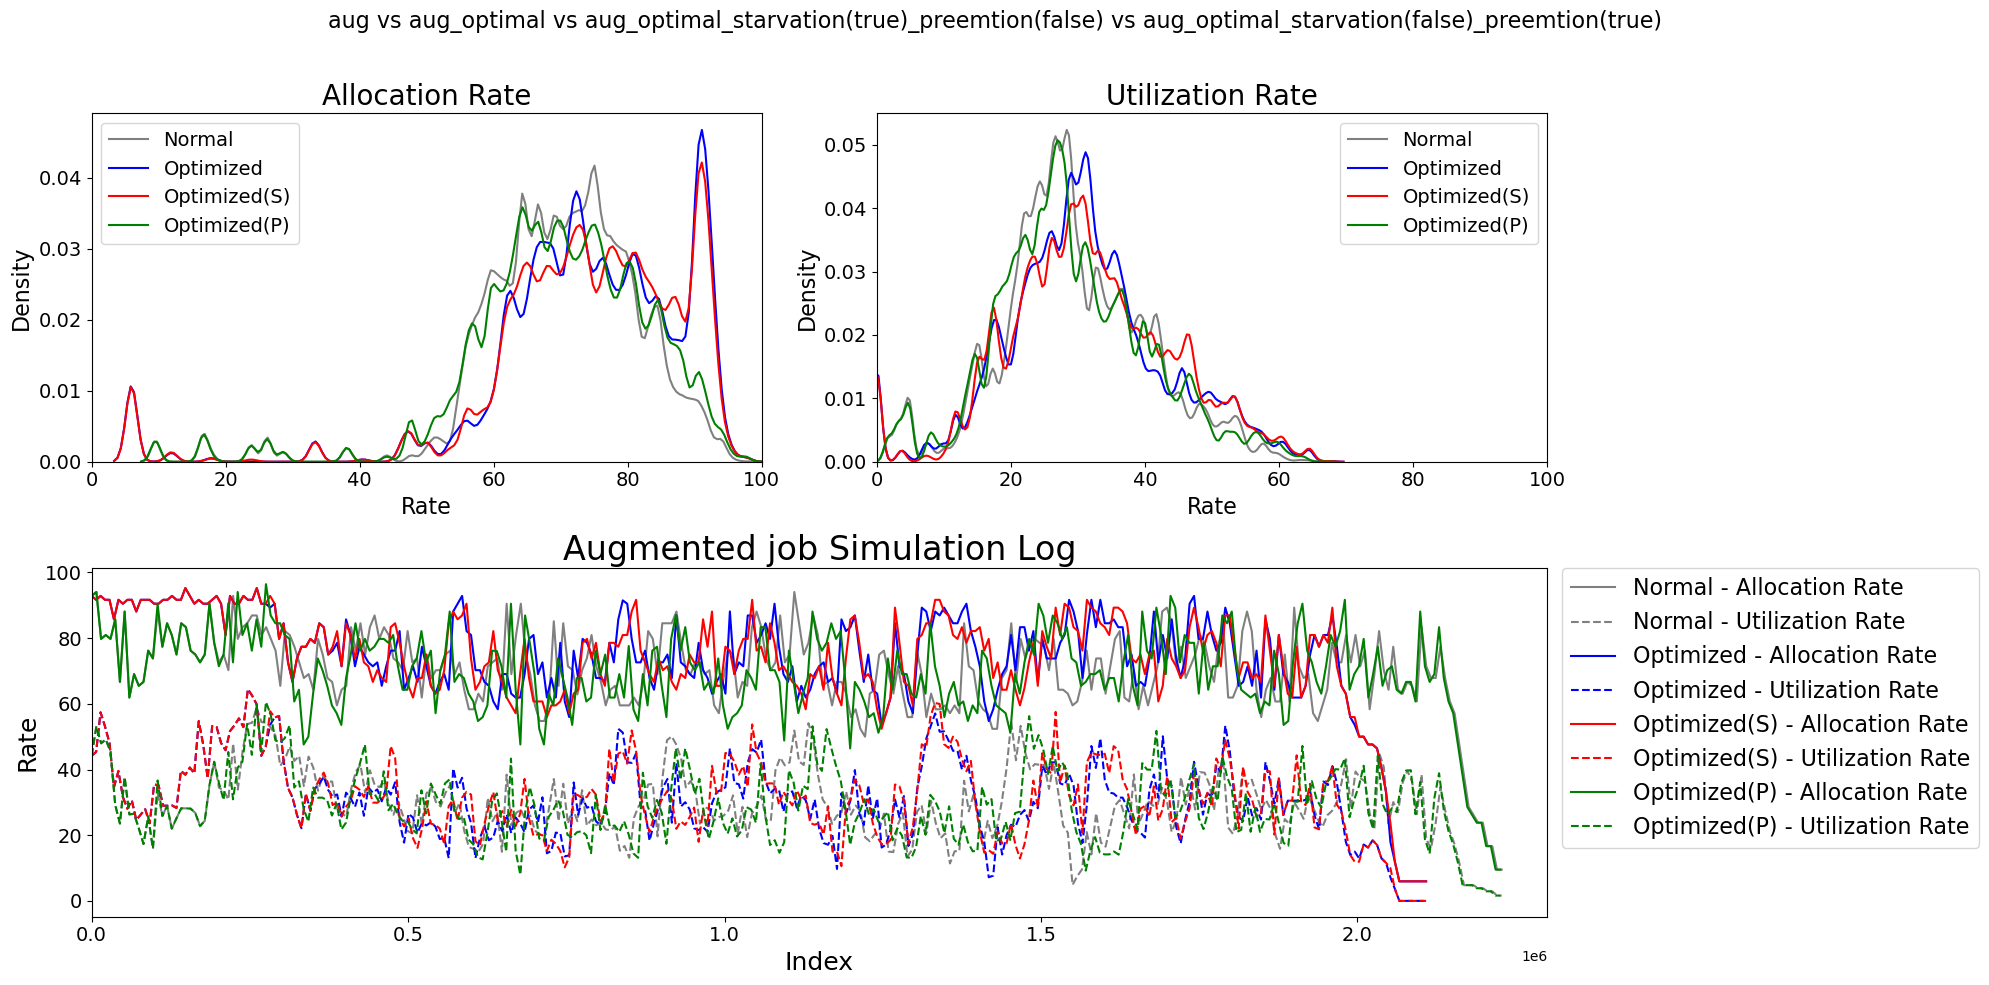

In [41]:
filenames = ["aug.result", "aug_optimal.result", "aug_optimal_starvation(true)_preemtion(false).result", "aug_optimal_starvation(false)_preemtion(true).result"]
plot_and_show_statistics_compare_all(
    filenames, 
    bin_count=30, 
    x_max=2300000, 
    show_legend=False, 
    title='Augmented job Simulation Log'
)

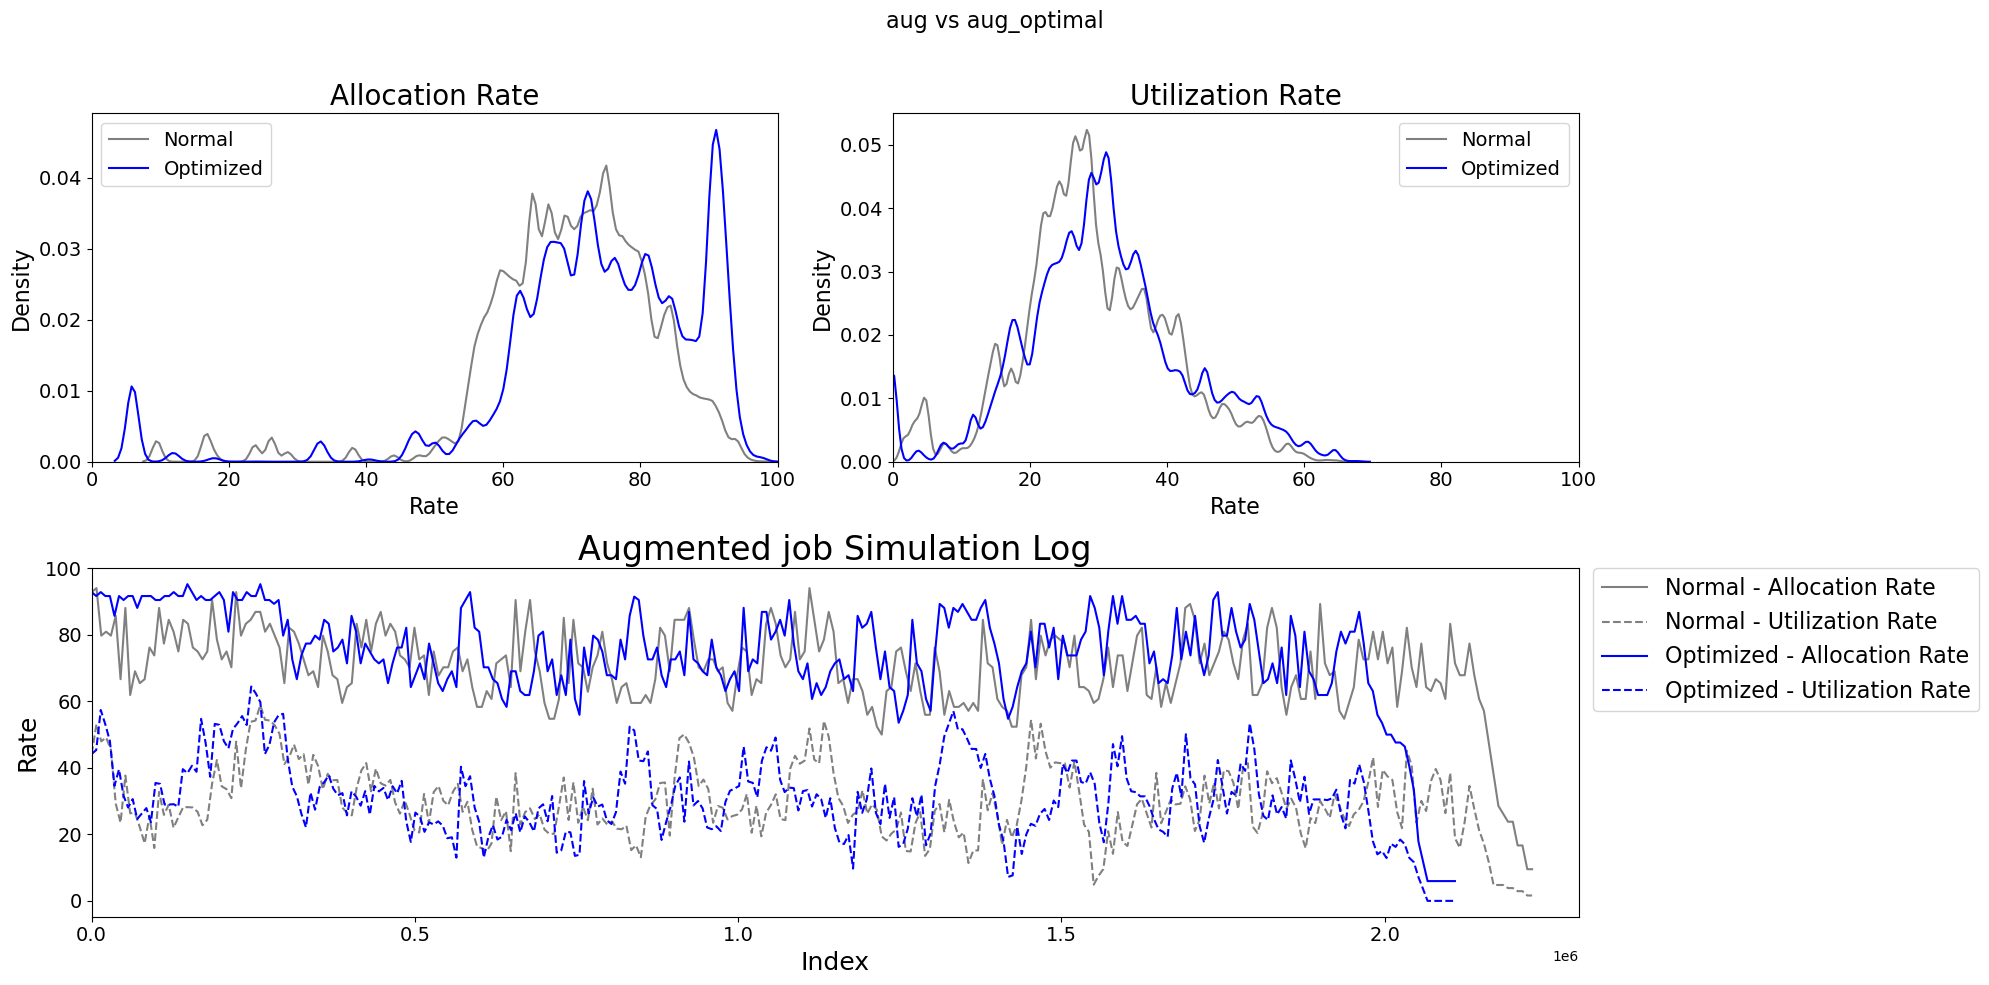

In [55]:
filenames = ["aug.result", "aug_optimal.result"]
plot_and_show_statistics_compare_all(
    filenames, 
    bin_count=30, 
    x_max=2300000, 
    show_legend=False, 
    title='Augmented job Simulation Log'
)

Allocation Rate Statistics:
count    2.228040e+06
mean     6.995303e+01
std      1.252856e+01
min      9.523810e+00
25%      6.428570e+01
50%      7.142860e+01
75%      7.738100e+01
max      9.880950e+01
Name: Allocation Rate, dtype: float64

Utilization Rate Statistics:
count    2.228040e+06
mean     2.944249e+01
std      1.080421e+01
min      1.617670e+00
25%      2.282260e+01
50%      2.824780e+01
75%      3.640940e+01
max      6.468000e+01
Name: Utilization Rate, dtype: float64


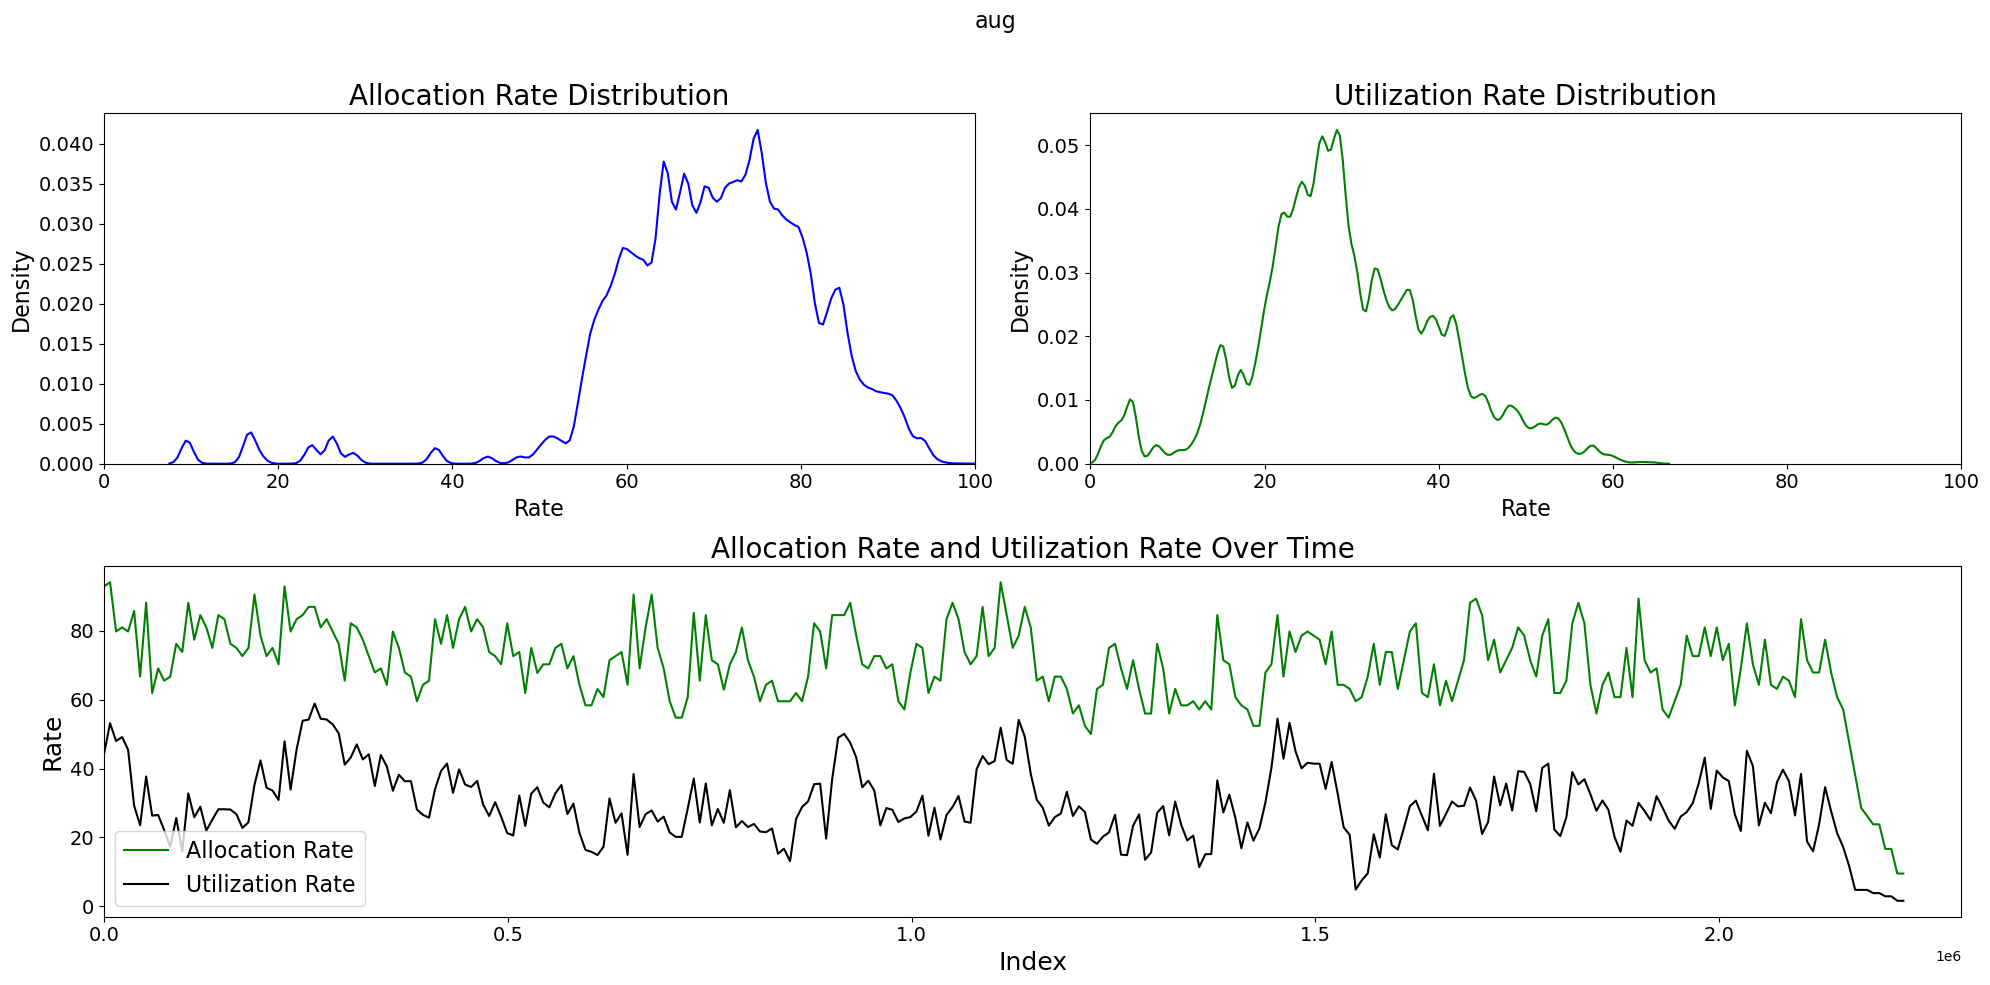

In [52]:
plot_and_show_statistics("aug.result", 100, 2300000)

Allocation Rate Statistics:
count    2.108646e+06
mean     7.391385e+01
std      1.588907e+01
min      5.952380e+00
25%      6.666670e+01
50%      7.500000e+01
75%      8.452380e+01
max      9.880950e+01
Name: Allocation Rate, dtype: float64

Utilization Rate Statistics:
count    2.108646e+06
mean     3.094486e+01
std      1.194653e+01
min      0.000000e+00
25%      2.369610e+01
50%      3.034920e+01
75%      3.733580e+01
max      6.762000e+01
Name: Utilization Rate, dtype: float64


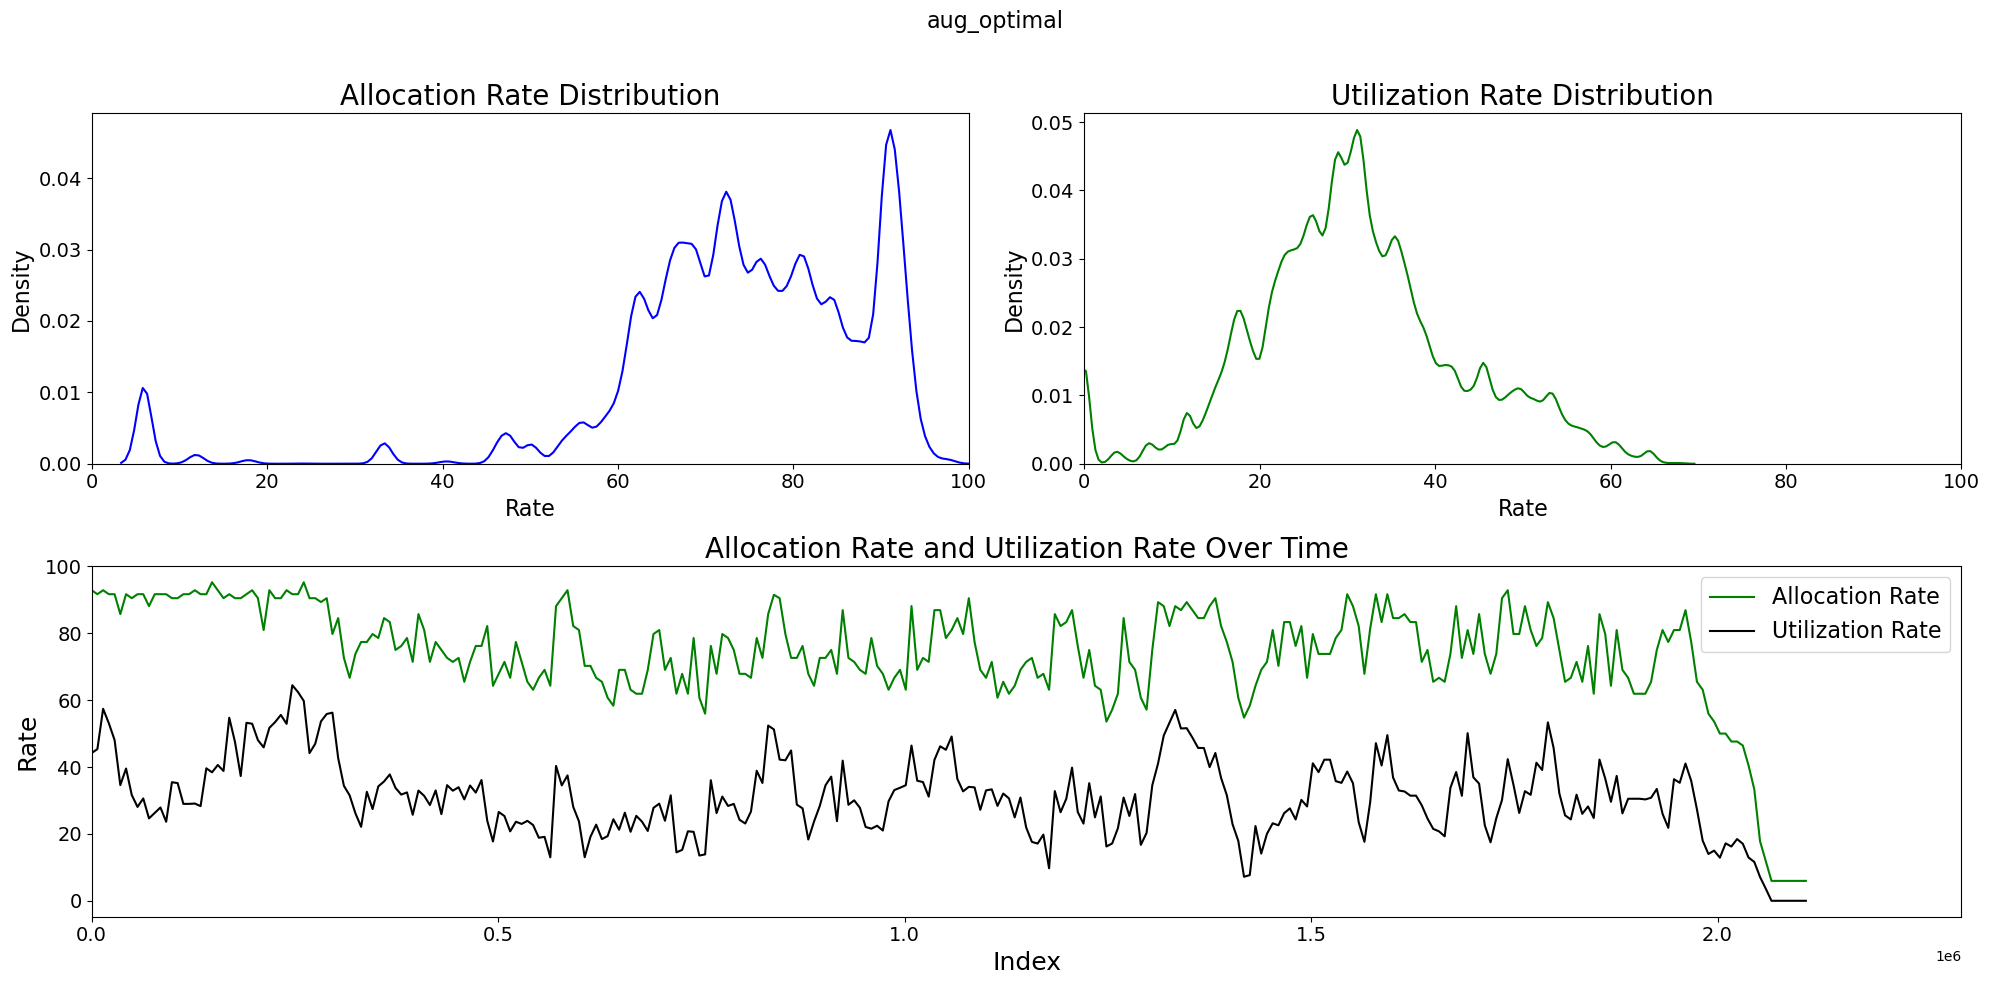

In [53]:
plot_and_show_statistics("aug_optimal.result", 100, 2300000)

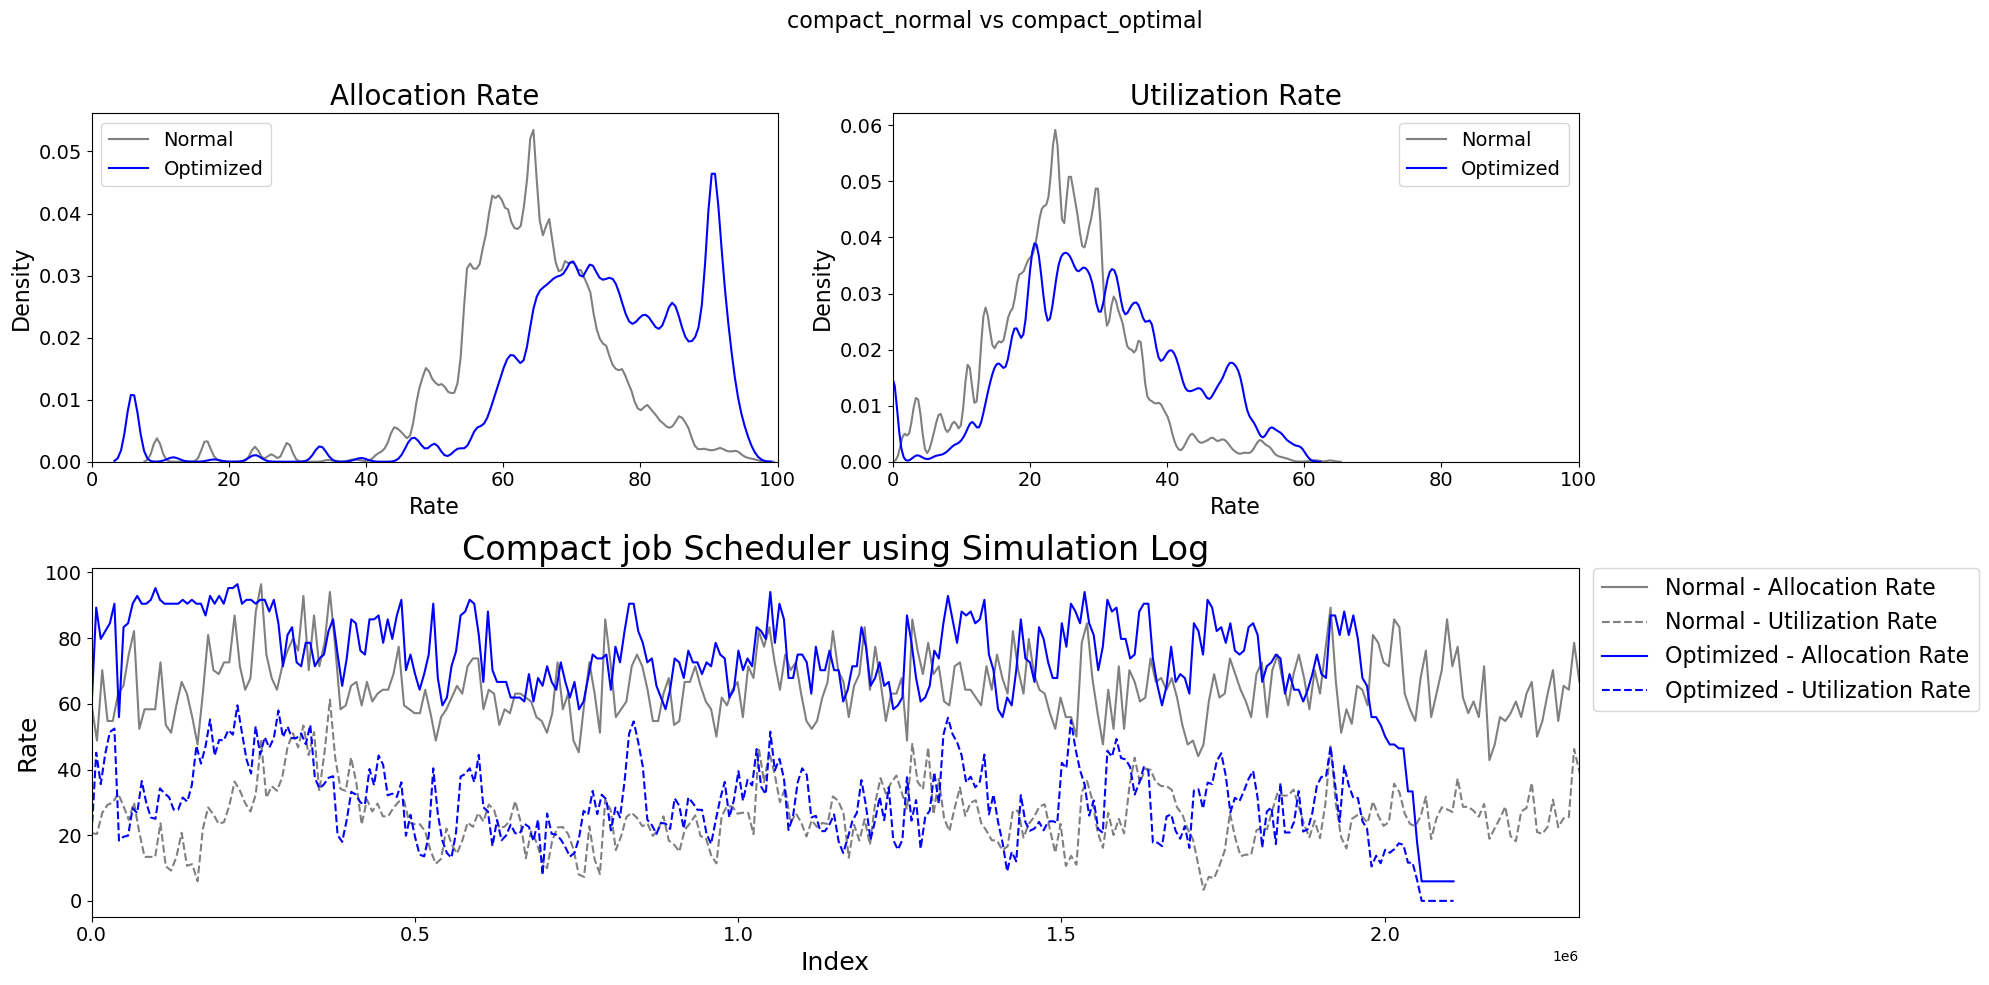

In [57]:
filenames = ["compact_normal.result", "compact_optimal.result"]
plot_and_show_statistics_compare_all(
    filenames, 
    bin_count=30, 
    x_max=2300000, 
    show_legend=False, 
    title='Compact job Scheduler using Simulation Log'
)

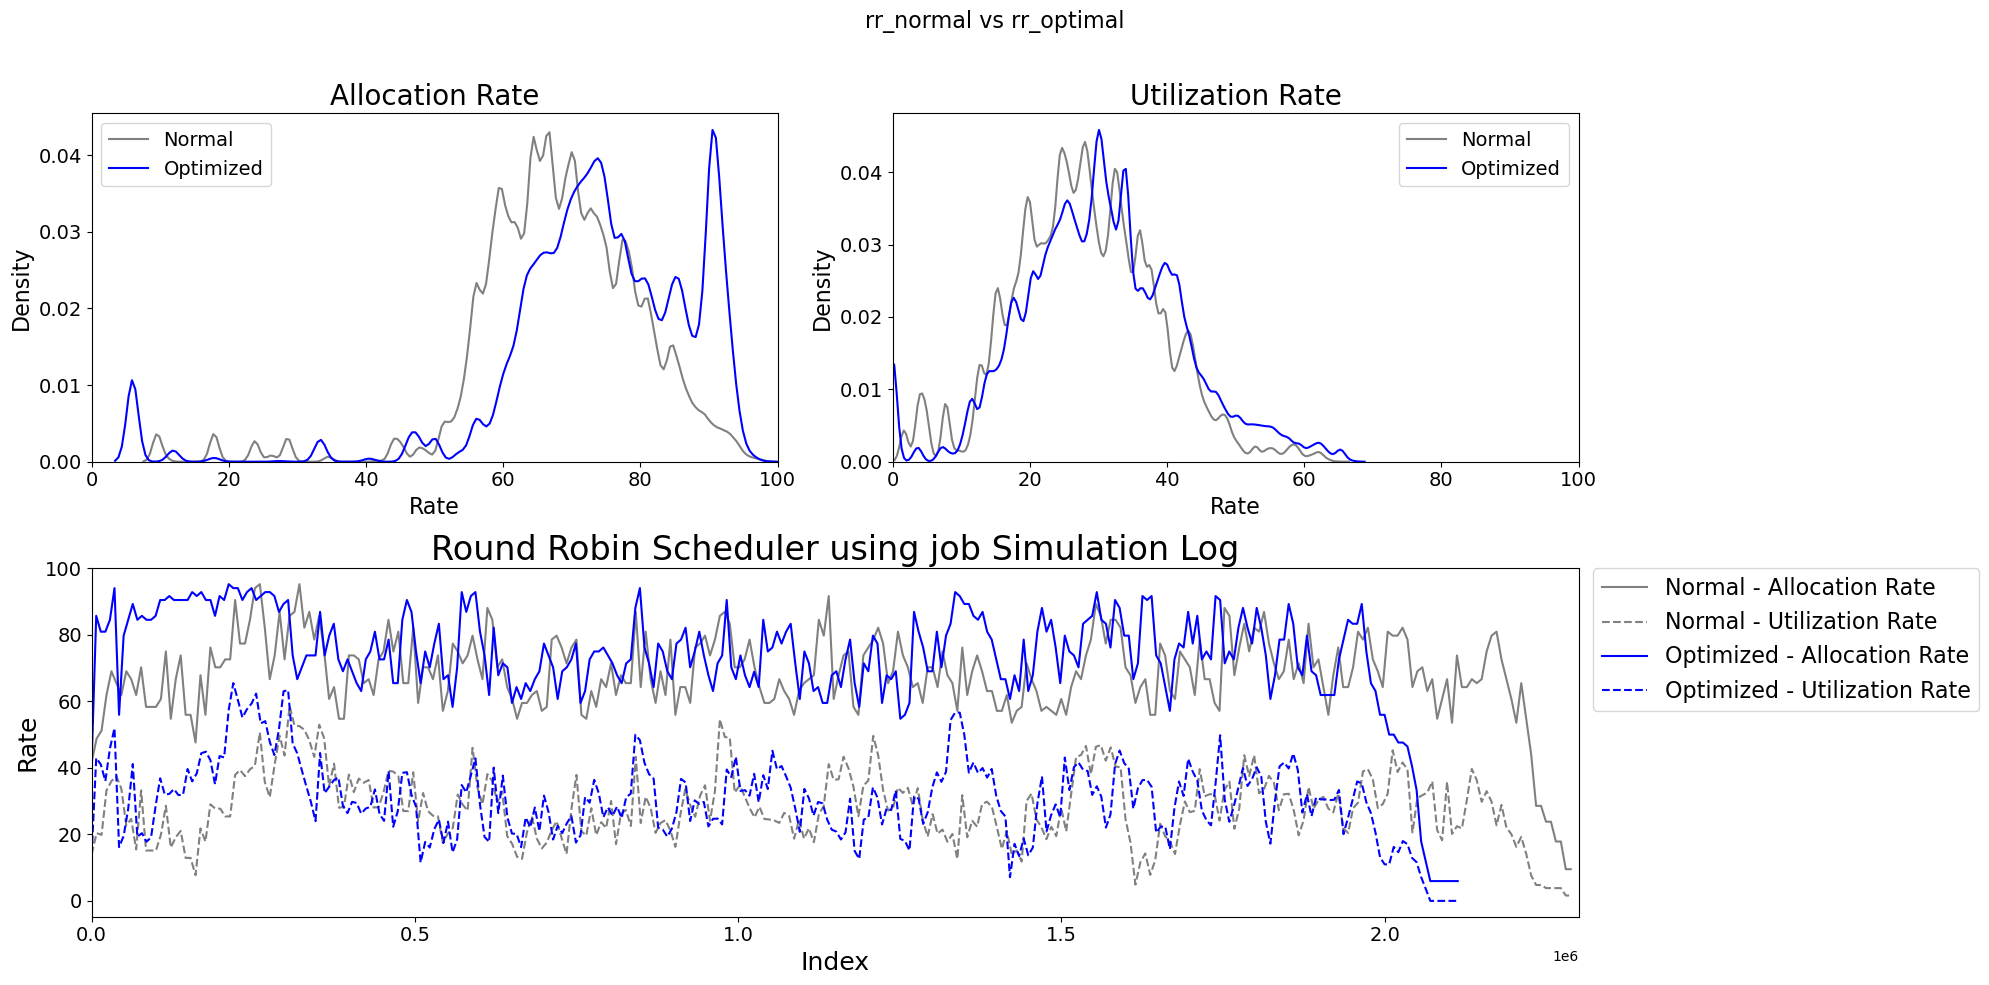

In [58]:
filenames = ["rr_normal.result", "rr_optimal.result"]
plot_and_show_statistics_compare_all(
    filenames, 
    bin_count=30, 
    x_max=2300000, 
    show_legend=False, 
    title='Round Robin Scheduler using job Simulation Log'
)

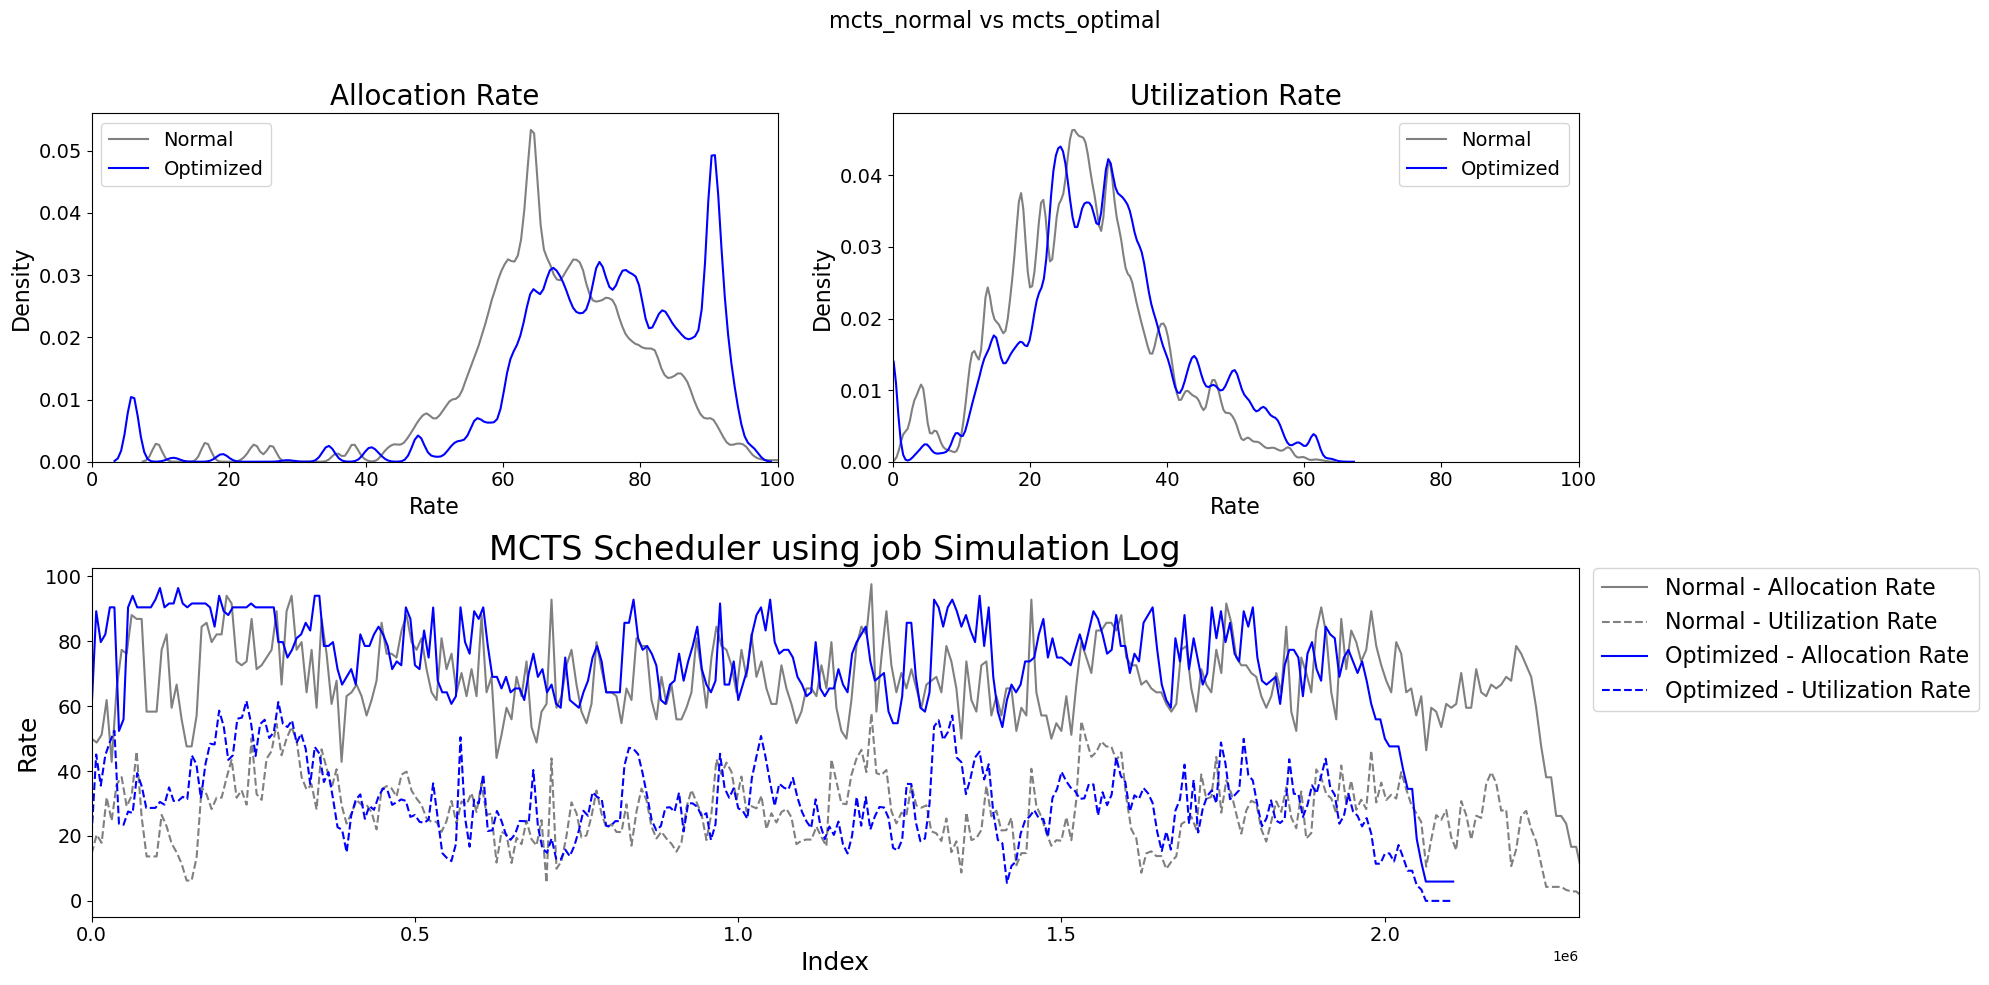

In [59]:
filenames = ["mcts_normal.result", "mcts_optimal.result"]
plot_and_show_statistics_compare_all(
    filenames, 
    bin_count=30, 
    x_max=2300000, 
    show_legend=False, 
    title='MCTS Scheduler using job Simulation Log'
)